# Risk

*Gotta `define` an optimizable end (love & charity), `engineer` a vast combinatorial space (hope & optimism), `resource`.fullness much data & to create accurate simulations (representation & faith)*

<iframe src="https://www.youtube.com/embed/YtPaZsasmNA" style="width:100%;height:500px;"></iframe>

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
Demis Hassabis delivered his Nobel Prize lecture "Accelerating scientific discovery with AI" on 8 December 2024 at the Aula Magna, Stockholm University. He was introduced by Professor Johan Åqvist, Member of the Nobel Committee for Chemistry.
```

Rosebud, Balalaika, Dude's rug -- items the "tie the story together". They're epilogue

## Generalist (Network) vs. Specialist (Edges)

That division captures a core historical trend in British intellectual and institutional culture, rooted in the differing philosophical legacies of Oxford and Cambridge. Here's my take on the underlying dynamics:

1. **Prime Ministers from Oxford**:  
   Oxford has historically cultivated leaders with a flair for rhetoric, a grounding in the classics, and a deep understanding of governance. Its tutorial system rewards debate and the ability to synthesize arguments, skills well-suited to political leadership. Think of Oxford-educated figures like Margaret Thatcher, Harold Wilson, or Tony Blair—each shaped by the university’s emphasis on the humanities and their ability to navigate the complexities of politics. Oxford breeds `generalists` with a talent for persuasion and political maneuvering, essential traits for prime ministers.

2. **Civil Service from Oxford**:  
   The civil service demands analytical thinking, institutional knowledge, and a knack for balancing tradition with reform. Oxford’s broad-based education provides future mandarins with a foundation in history, philosophy, and law, equipping them to maintain the machinery of state. The “Oxford don” archetype fits naturally into the advisory and administrative roles that underpin governance. Oxford’s culture of pragmatism and continuity aligns with the demands of a `stable bureaucracy`.

3. **Nobel Prizes from Cambridge**:  
   Cambridge, by contrast, has always leaned into `specialization`, empiricism, and scientific discovery. Its college system fosters intellectual communities dedicated to advancing knowledge in precise fields. The Cavendish Laboratory, for instance, revolutionized physics and biology. Names like Watson and Crick, Dirac, and Hawking, not to mention Newton, Rutherford, Maxwell, and Darwin, attest to Cambridge’s scientific dominance. The Nobel trend reflects Cambridge’s tradition of encouraging theoretical breakthroughs and experimental rigor, particularly in `natural sciences`.

In essence, Oxford embodies the art of governance and discourse, while Cambridge champions the pursuit of scientific truth. It’s a complementary dichotomy, each institution excelling in its lane and reinforcing the broader power of British intellectualism. Where would you say this dynamic fits in the context of modern Britain? Do Oxford’s politicians still steer the ship, or has the era of the technocrat diluted their sway?

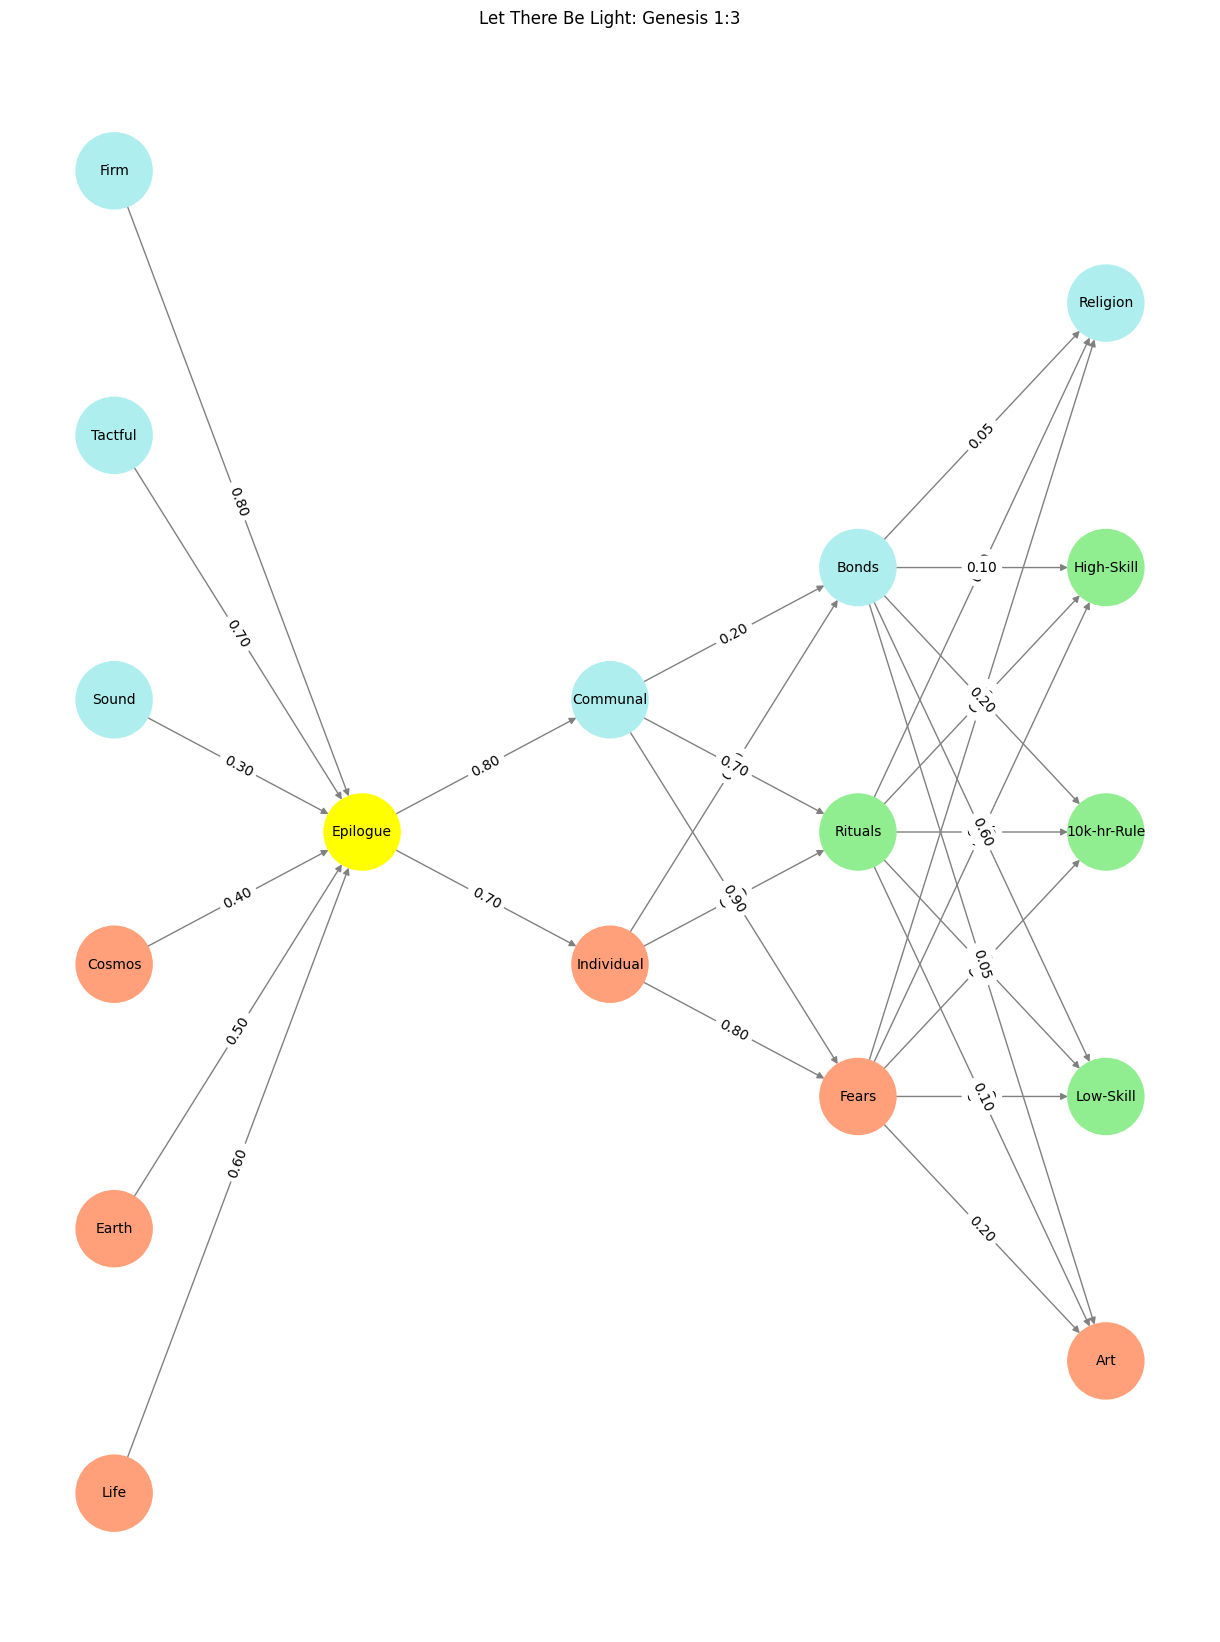

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        # Natural Sciences & Stable Bureaucracies
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Epilogue'],
        'Input': ['Individual', 'Communal'],
        'Hidden': [
            'Fears',
            'Rituals',
            'Bonds',
        ],
        'Output': ['Art', 'Low-Skill', '10k-hr-Rule', 'High-Skill', 'Religion',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Epilogue':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Communal':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Bonds':
            return 'paleturquoise'
        elif node == 'Rituals':
            return 'lightgreen'
        elif node == 'Fears':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Religion':
            return 'paleturquoise'
        elif node in ['High-Skill', '10k-hr-Rule', 'Low-Skill']:
            return 'lightgreen'
        elif node == 'Art':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Let There Be Light: Genesis 1:3")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

## Making Search Tractable



# Making Search Tractable: The Essence of Optimization in Complex Systems

The problem of making search tractable in enormous combinatorial spaces is foundational to science, technology, and human understanding. In the [2024 Nobel Prize Lecture for Chemistry](https://www.nobelprize.org/prizes/chemistry/2024/hassabis/lecture/), Demis Hassabis articulated an elegant and universal approach to this challenge. His framework synthesizes computational principles with deep insights into the nature of complex systems. By breaking the problem into five key steps, Hassabis offered not just a technical recipe but a lens through which to understand the broader implications of tractability in search and discovery. 

### Taking a Step Back: The Essence of Our Systems  
The first step in making search tractable is to ask: *What is the essence of the system we are studying, and what are we trying to accomplish?* This step requires abstraction, reducing the problem to its most fundamental elements. In doing so, we often uncover hidden symmetries, invariants, or underlying patterns that simplify the landscape of possibilities. Hassabis emphasized that understanding the essence of a system requires both intuition and analysis, blending the creativity of human insight with the rigor of formal modeling. Without this foundation, subsequent steps risk misdirection—searching vast spaces for answers that are irrelevant or incoherent with the problem at hand. 

### Compression: Navigating Enormous Combinatorial Spaces  
Once the essence is clarified, the next challenge is to find an optimal solution within a vast combinatorial space. This is the domain of *compression*: reducing the effective dimensionality of the problem without losing critical information. Hassabis argued that compression is more than a computational trick; it is a philosophical stance. By focusing on what truly matters—key variables, relationships, or constraints—we transform an intractable problem into one that is solvable. Examples of this principle abound, from the use of symmetries in quantum chemistry to the deployment of neural networks in artificial intelligence. Compression, in essence, is the art of making the impossible merely difficult.

### Learning the Model: From Data to Understanding  
Compression leads naturally to the third step: *learning a model of the environment from data or simulation.* Here, we bridge the gap between abstract principles and empirical reality. Hassabis described how modern computational techniques, such as deep learning and reinforcement learning, enable the construction of models that are both accurate and adaptable. These models act as surrogates for the real world, capturing its dynamics in a way that is computationally efficient and actionable. By learning from data, we align our theoretical frameworks with the messy, noisy truths of the systems we study.

### Guiding the Search: Using Models to Optimize  
Armed with a model, the next step is to use it to guide a search according to an objective function. This process translates the abstract goal of finding an optimal solution into a concrete, iterative procedure. The choice of the objective function is critical, as it defines what "optimal" means in the context of the problem. Whether maximizing energy efficiency, minimizing computational cost, or achieving a balance between competing criteria, the objective function serves as the compass for the search. Hassabis illustrated this step with examples ranging from protein folding to drug discovery, where models not only accelerate the search but also illuminate the pathways leading to solutions.

### Universality: A Generous Approach to Problem-Solving  
The final insight is perhaps the most profound: this framework is not confined to a single domain. *Many problems fit this approach.* Whether in chemistry, biology, artificial intelligence, or beyond, the principles of essence, compression, modeling, guided search, and optimization resonate across disciplines. Hassabis called this a "generous solution" because it provides a unifying framework for addressing complexity, one that transcends traditional boundaries and invites collaboration across fields. This universality reflects the deep structure of reality itself, where the same patterns emerge again and again in different guises.

### Conclusion  
The framework outlined by Demis Hassabis in his Nobel lecture is both a practical guide and a philosophical manifesto. By taking a step back to understand the essence of systems, compressing their complexity, learning models from data, guiding searches with objective functions, and embracing the universality of this approach, we can make the intractable tractable. This is more than a recipe for solving problems; it is a way of thinking that unites disciplines, expands horizons, and pushes the boundaries of human understanding. In the spirit of the lecture, we are reminded that the tools of science and computation are not just means to an end but reflections of our deepest aspirations: to comprehend, to create, and to connect.

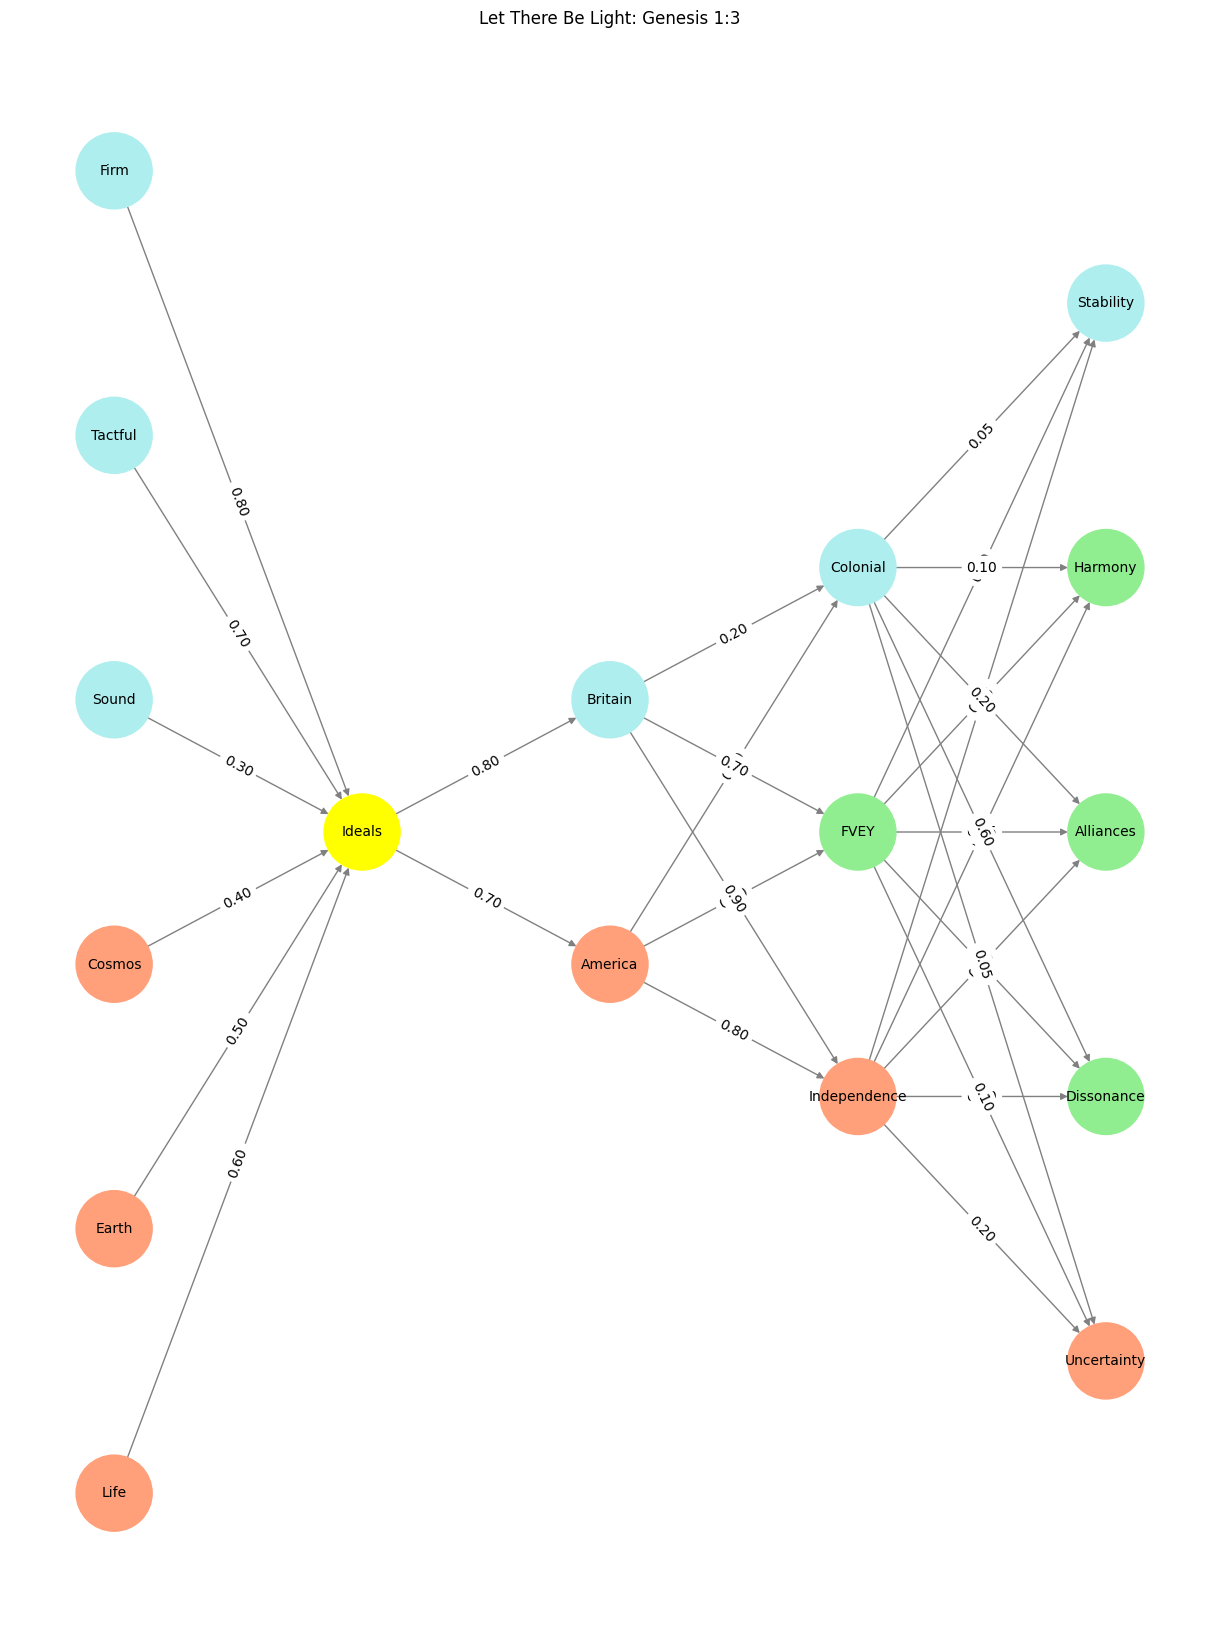

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Ideals'],
        'Input': ['America', 'Britain'],
        'Hidden': [
            'Independence',
            'FVEY',
            'Colonial',
        ],
        'Output': ['Uncertainty', 'Dissonance', 'Alliances', 'Harmony', 'Stability',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Ideals':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Britain':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Colonial':
            return 'paleturquoise'
        elif node == 'FVEY':
            return 'lightgreen'
        elif node == 'Independence':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Stability':
            return 'paleturquoise'
        elif node in ['Harmony', 'Alliances', 'Dissonance']:
            return 'lightgreen'
        elif node == 'Uncertainty':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Let There Be Light: Genesis 1:3")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
In this neural network, we see the poetry of governance. Every node, edge, and weight is a verse in the epic of a nation striving to define itself against the backdrop of time. From the Pre-Input of cosmic forces to the Output of modern identity, this system is a tribute to the eternal balancing act of human existence: the quest to belong while reaching for something greater.
```



 

#
